In [187]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tueplots import axes

data = pd.read_csv('../Prepared_Data/data.csv')

In [193]:
##### Set the Plot Sheme #####
import tueplots
from tueplots import bundles
from tueplots import figsizes, fontsizes

# this provides the color palette of Uni Tuebingen
from tueplots.constants.color import rgb
# e.g. as rgb.tue_blue, rgb.tue_red, etc.

# set plotting stylesheet
#plt.rcParams.update(bundles.icml2022(column='full', nrows=1, ncols=2, usetex=False))

plt.style.use('default') 



In [189]:
##### Cluster data #####

# remove rows that have values missing
data = data.dropna()

# calculate correlation between 'year' and each complexity factor
correlation_with_year = data[['year', 'number_of_parts', 'minifig_quantitiy', 'number_of_colors',
                                   'number_of_categories', 'number_of_unique_parts', 'number_of_different_parts',
                                   'not_unique_parts', 'proportion_unique_to_not_unique']].corr()['year']


print(correlation_with_year)

# select relevant columns for clustering
columns_for_clustering = ['number_of_parts', 'minifig_quantitiy', 'number_of_colors',
                           'number_of_categories', 'number_of_unique_parts',
                           'number_of_different_parts', 'not_unique_parts',
                           'proportion_unique_to_not_unique']

# extract the selected columns for clustering
data_for_clustering = data[columns_for_clustering]

# impute missing values using mean strategy
imputer = SimpleImputer(strategy='mean')
data_for_clustering_imputed = imputer.fit_transform(data_for_clustering)

# standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering_imputed)

# determine the optimal number of clusters using the elbow method
wcss = []  # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

year                               1.000000
number_of_parts                    0.167349
minifig_quantitiy                  0.142818
number_of_colors                   0.390034
number_of_categories               0.306093
number_of_unique_parts             0.265063
number_of_different_parts          0.229051
not_unique_parts                   0.156939
proportion_unique_to_not_unique    0.043316
Name: year, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

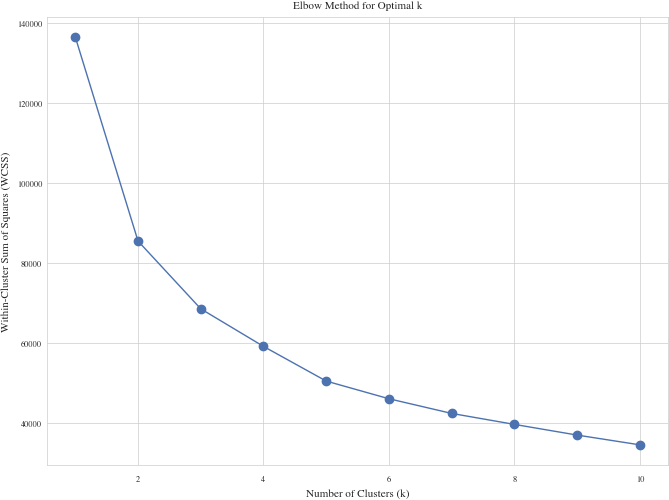

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:208: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  self._figure.subplots_adjust(right=right)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


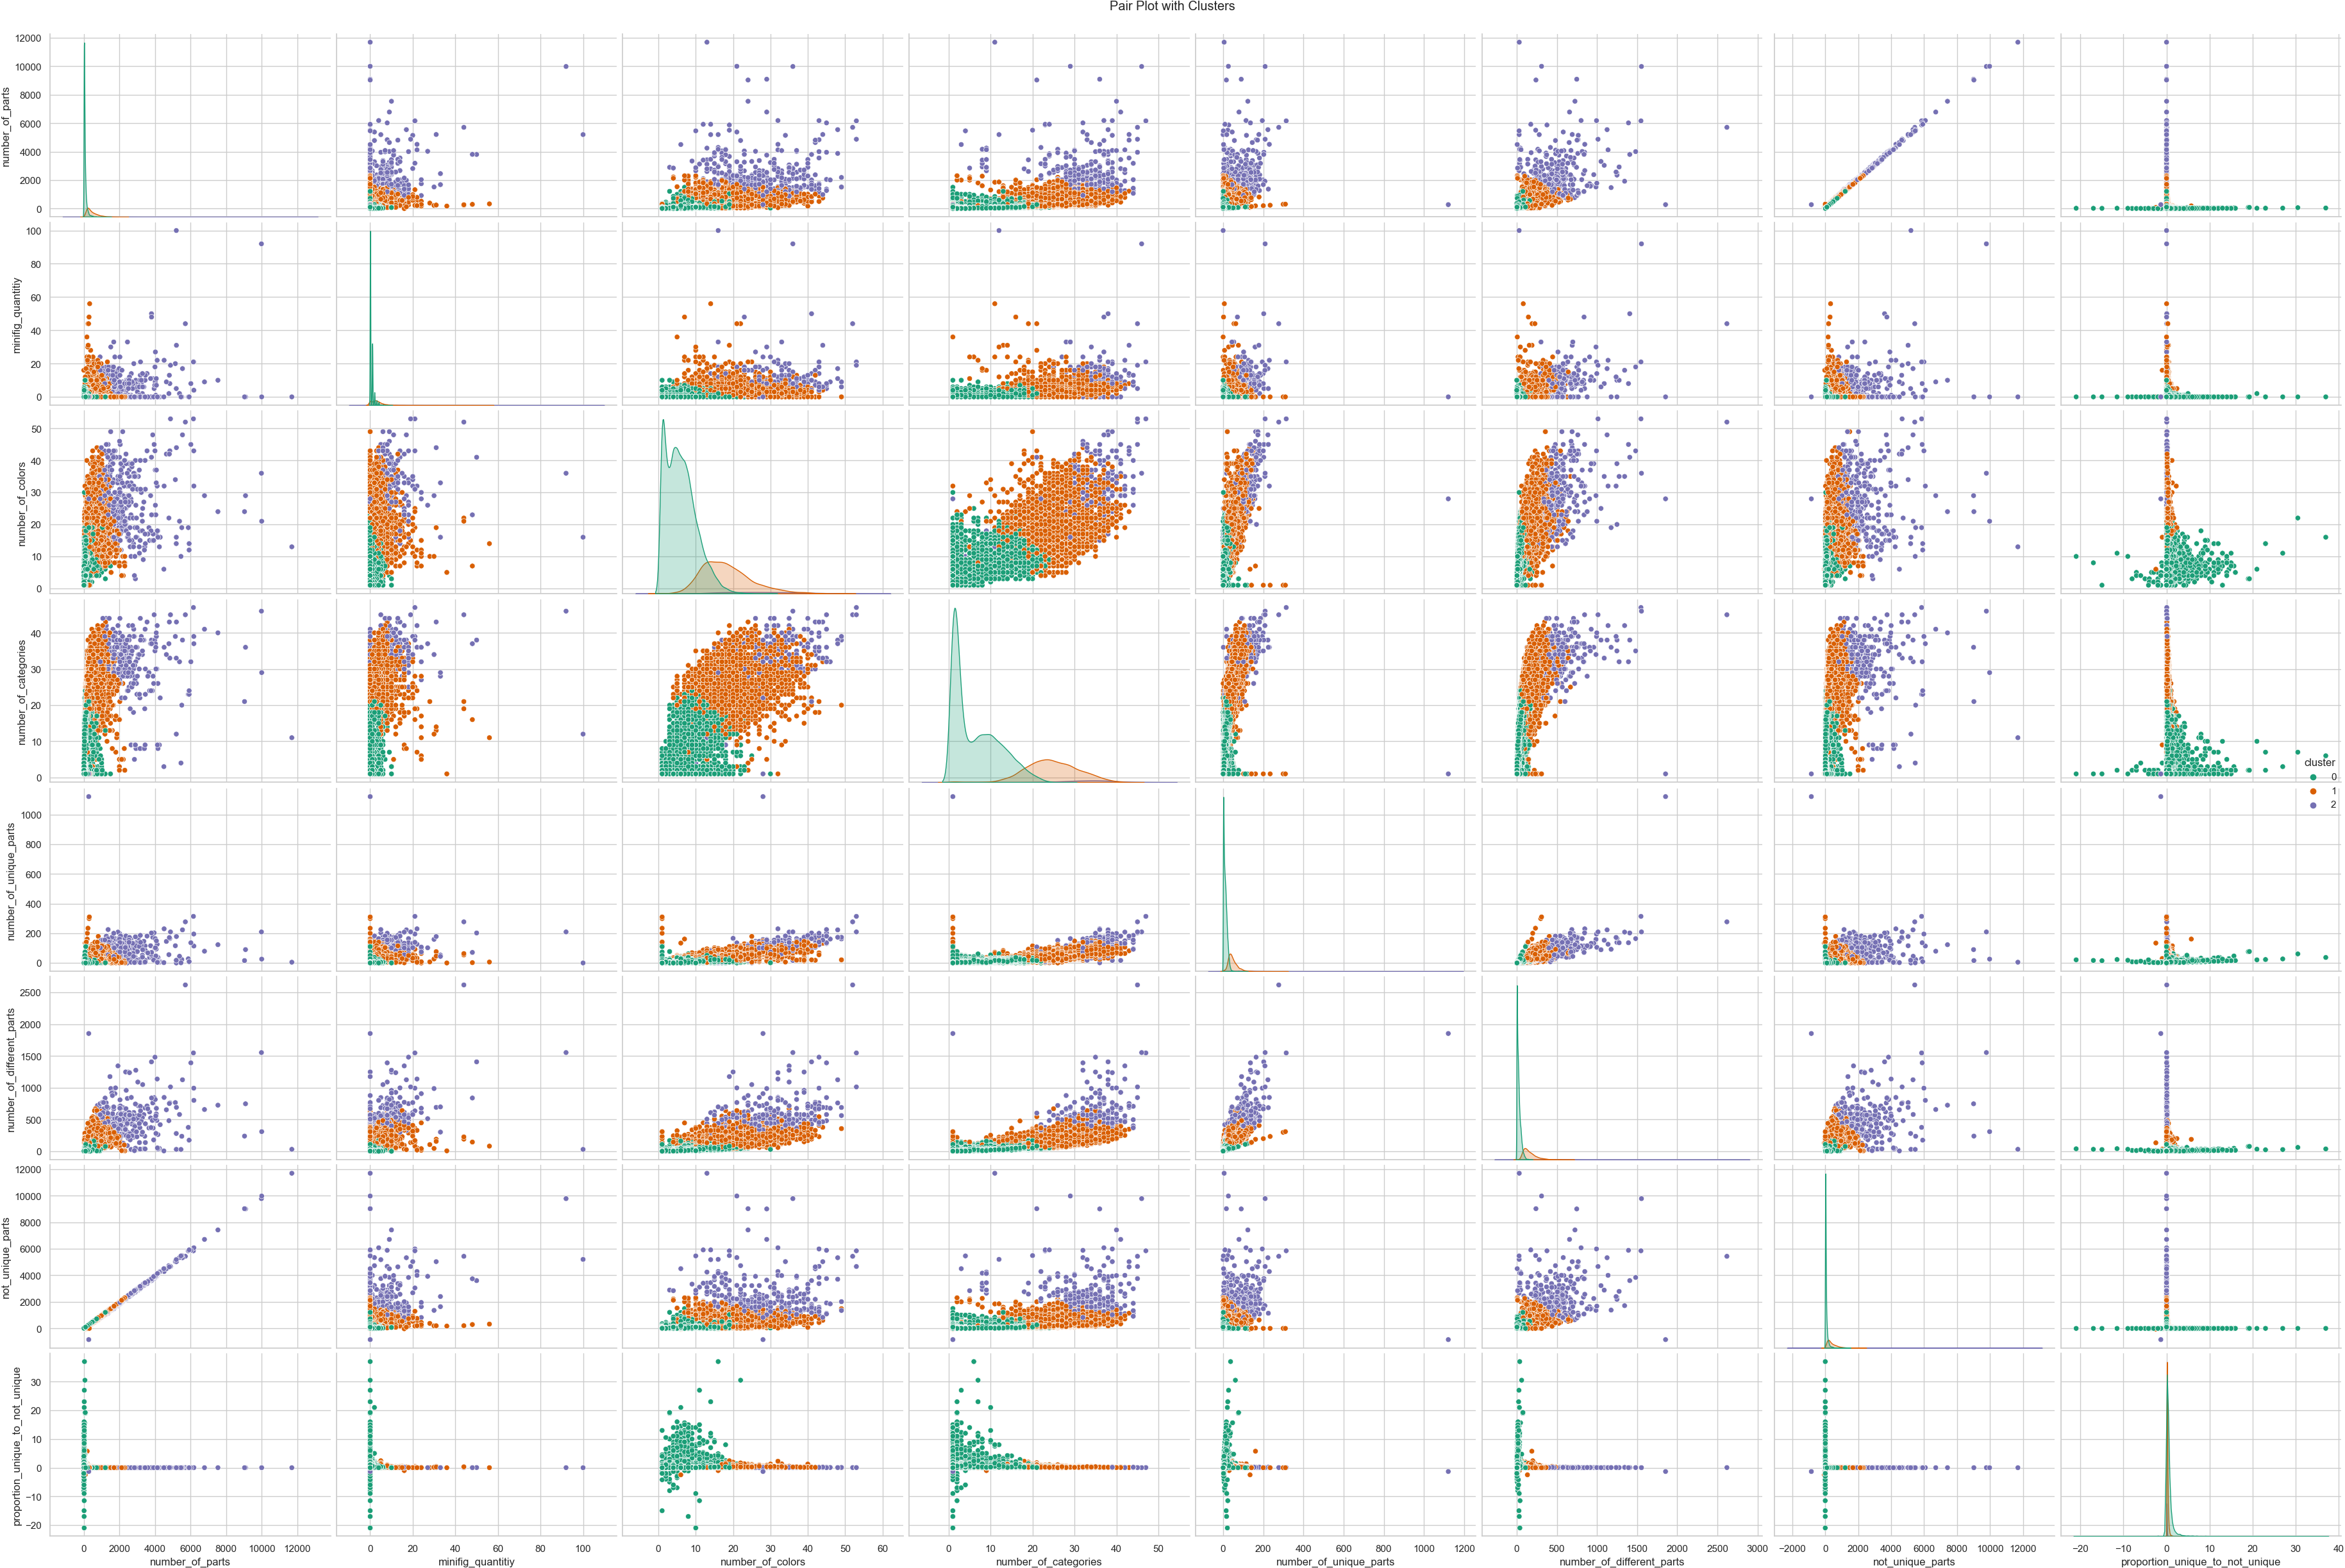

In [190]:
##### Plot the elbow method graph #####

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Based on the elbow method, choose the optimal number of clusters
optimal_k = 3  # You can change this based on the plot

# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original DataFrame
data['cluster'] = clusters

# Visualize the clusters using a pair plot
sns.set(style="whitegrid")
sns.pairplot(data, hue='cluster', palette='Dark2', vars=columns_for_clustering, height=3, aspect=1.5)
plt.suptitle('Pair Plot with Clusters', y=1.02)
plt.show()

In [191]:
##### Print means of different factors in the clusters #####

# select only numeric columns for aggregation
numeric_columns = ['number_of_parts', 'minifig_quantitiy', 'number_of_colors',
                    'number_of_categories', 'number_of_unique_parts',
                    'number_of_different_parts', 'not_unique_parts',
                    'proportion_unique_to_not_unique', 'complexity_score']

# ensure numeric columns have the correct data types (convert if necessary)
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# drop rows with missing values
df = data.dropna(subset=numeric_columns)

# group by cluster and calculate mean for numeric columns
cluster_means = data.groupby('cluster')[numeric_columns].mean()

# display the cluster means
print(cluster_means)

         number_of_parts  minifig_quantitiy  number_of_colors   
cluster                                                         
0              62.952691           0.475631          6.056993  \
1             463.227087           3.252345         18.147943   
2            2574.987578           7.602484         27.413043   

         number_of_categories  number_of_unique_parts   
cluster                                                 
0                    6.442134                9.517146  \
1                   24.580707               47.147943   
2                   32.052795               96.636646   

         number_of_different_parts  not_unique_parts   
cluster                                                
0                        23.235672         53.435545  \
1                       159.547510        416.079144   
2                       512.841615       2478.350932   

         proportion_unique_to_not_unique  complexity_score  
cluster                                       

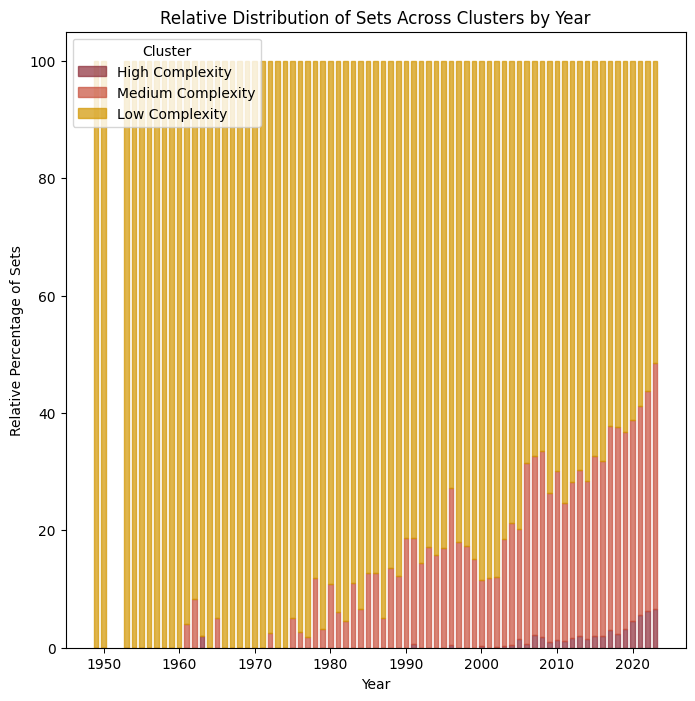

In [197]:
##### Plot the relative percentage of sets in each cluster for every year #####

# group by year and cluster, and calculate the relative percentage
cluster_year_counts = df.groupby(['year', 'cluster']).size().reset_index(name='set_count')
cluster_year_counts['relative_percentage'] = (
    cluster_year_counts.groupby('year')['set_count'].transform(lambda x: x / x.sum()) * 100
)

# pivot the DataFrame to have clusters as columns
pivot_df = cluster_year_counts.pivot(index='year', columns='cluster', values='relative_percentage').fillna(0)

# create the figure and axes
fig, ax = plt.subplots(figsize=(8,8))

# plot the stacked bar plot using ax.bar
years = pivot_df.index
clusters_plot = pivot_df.columns
bottom_values = pd.Series(0, index=years)
colors = [rgb.tue_red, rgb.tue_ocre, rgb.tue_orange]

cluster_labels = {
    0: 'Low Complexity',
    1: 'Medium Complexity',
    2: 'High Complexity'}

# reverse the order of clusters
for cluster, color in zip(reversed(clusters_plot), colors):
    ax.bar(
        years,
        pivot_df[cluster],
        bottom=bottom_values,
        label=cluster_labels[cluster],
        alpha=0.7,
        color=color,
        edgecolor=color,
        width=0.6
    )
    bottom_values += pivot_df[cluster]

ax.set_title('Relative Distribution of Sets Across Clusters by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Relative Percentage of Sets')
plt.tick_params(axis='x', which='major', bottom=True, width=0.7)    
#ax.set_xlim(1948, 2024)
ax.legend(title='Cluster')
plt.savefig('../Images/Clusters.pdf')
plt.show()
